In [1]:
import numpy as np

In [2]:
import sys

In [3]:
from pycurrents.adcp.rdiraw import Multiread

In [4]:
from modest_image import imshow

In [202]:
fname='/Volumes/wjlee_apl_2/2017_cruises/ADCP_RR1713/raw/os150/rr2017_208_65011.raw'
#fname='/Volumes/wjlee_apl_2/2017_cruises/ADCP_RR1713/raw/os150/rr2017_207_65746.raw'
#fname='/Volumes/wjlee_apl_2/2017_cruises/ADCP_RR1713/raw/os150/rr2017_218_43200.raw'

In [203]:
m=Multiread(fname,'os')

In [204]:
data=m.read()

In [205]:
import matplotlib.pyplot as plt

In [206]:
data.pingtype

'bb'

In [207]:
m.list_configs()

# index (ping, NCells, CellSize, Blank, Pulse) nfiles
0    (bb, 80, 4.0, 4.0, 4.0)     1
1    (nb, 60, 8.0, 4.0, 8.0)     1


In [208]:
data

{'Bin1Dist': 8.22,
 'Blank': 4.0,
 'CellSize': 4.0,
 'FL': {'Bin1Dist': 822,
  'Blank': 400,
  'CellSize': 400,
  'EA': -400,
  'EV': 0,
  'EVMax': 1000,
  'EX': 0,
  'EZ': 93,
  'FWR': 19,
  'FWV': 23,
  'LowCorrThresh': 120,
  'NBeams': 4,
  'NCells': 80,
  'NCodeReps': 10,
  'NPings': 1,
  'PGMin': 0,
  'Pulse': 408,
  'RL0': 1,
  'RL1': 1,
  'SA': 29,
  'SPM': 1,
  'SysCfg': 585,
  'TPP_hun': 10,
  'TPP_min': 0,
  'TPP_sec': 1,
  'TransLag': 40,
  'WA': 255,
  'spare1': 0,
  'spare2': 6,
  'spare3': 0},
 'NBeams': 4,
 'NCells': 80,
 'NPings': 1,
 'Pulse': 4.08,
 'VL': array([ (1, 17, 7, 28, 18, 3, 30, 53, 0, 0, 1497, 0, 0, 0, 0, 35, 1208, 0, 0, 53, 0, 0, 0, '', 3, 0, 0, 0),
        (2, 17, 7, 28, 18, 3, 32, 85, 0, 0, 1497, 0, 0, 0, 0, 35, 1205, 0, 0, 52, 0, 0, 0, '', 0, 0, 0, 0),
        (3, 17, 7, 28, 18, 3, 35, 18, 0, 0, 1497, 0, 0, 0, 0, 35, 1201, 0, 0, 53, 0, 0, 0, '', 3, 0, 0, 0),
        ...,
        (2972, 17, 7, 28, 19, 59, 50, 51, 0, 0, 1497, 0, 0, 0, 0, 35, 1210, 0, 0, 52

In [209]:
%matplotlib inline

## Verify  data.amp1 is  idential with the first slice of data.amp

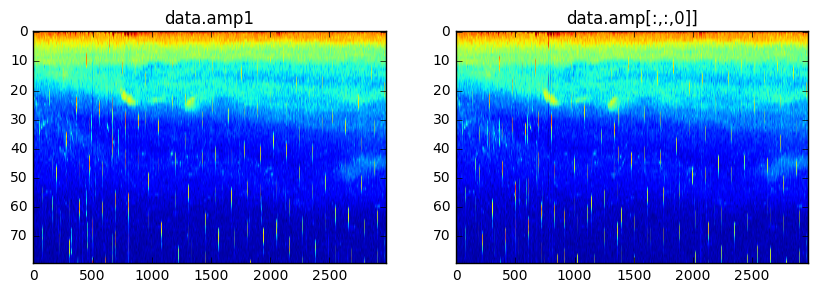

In [210]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.imshow(data.amp1.T,aspect='auto')
plt.title('data.amp1')

plt.subplot(1,2,2)
plt.imshow(data.amp[:,:,0].T,aspect='auto')
plt.title('data.amp[:,:,0]]')

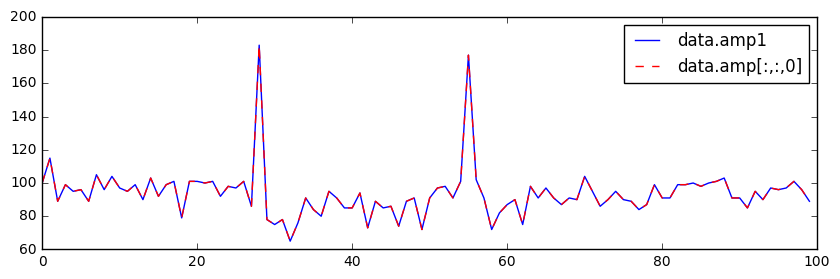

In [211]:
plt.figure(figsize=(10,3))
plt.plot(data.amp1[750:850,15],label='data.amp1')
plt.plot(data.amp[750:850,15,0],'r--',label='data.amp[:,:,0]')
plt.legend()

In [212]:
data.amp1.shape

(2974, 80)

In [213]:
data.amp.shape

(2974, 80, 4)

## Figure out axis labels

In [214]:
import math

In [215]:
import datetime

In [216]:
import jdcal

In [217]:
data.dday

array([ 208.75243669,  208.75246354,  208.75249051, ...,  208.8332235 ,
        208.83325069,  208.83327789])

### Test to convert to ping time

In [282]:
yr1day = jdcal.gcal2jd(data.yearbase,1,1)

In [283]:
gcal = jdcal.jd2gcal(yr1day[0],yr1day[1]+data.dday[0])
gcal

(2017, 7, 28, 0.7524366898142034)

In [284]:
tt = datetime.datetime(year=gcal[0],month=gcal[1],day=gcal[2]) +datetime.timedelta(days=gcal[-1])
tt

datetime.datetime(2017, 7, 28, 18, 3, 30, 530000)

### Make xtick labels

In [237]:
ping_jump = 1000
xx_pingtime = data.dday[::ping_jump]  # every 1000th ping
gcal = [jdcal.jd2gcal(yr1day[0],yr1day[1]+x) for x in xx_pingtime]
xx_datetime = [datetime.datetime(year=x[0],month=x[1],day=x[2]) +datetime.timedelta(days=x[-1]) for x in gcal ]
xx_ticklabel = [x.strftime('%H:%M:%S') for x in xx_datetime]
xx_ticklabel

['18:03:30', '18:42:39', '19:21:48']

In [238]:
data.dep.shape

(80,)

### Plot raw amplitude using correct axes

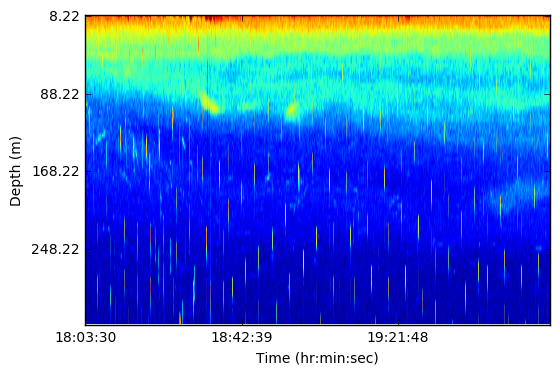

In [290]:
plt.imshow(data.amp1.T,aspect='auto')
plt.xticks(range(0,data.amp1.shape[0],ping_jump),xx_ticklabel)
plt.yticks(range(0,data.amp1.shape[1],20),data.dep[::20])
plt.xlabel('Time (hr:min:sec)')
plt.ylabel('Depth (m)')

### Check all 4 beams

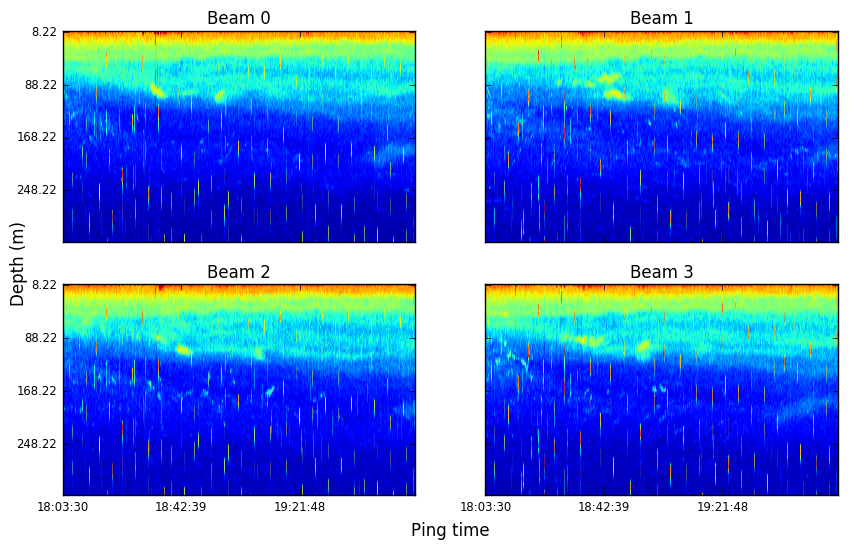

In [291]:
fig,ax = plt.subplots(2,2,sharex=True,sharey=True,figsize=(10,6))
#fig = plt.figure(figsize=(10,8))
for i in range(2):
    for j in range(2):
        seq = i*2+j
        ax[i,j].imshow(data.amp[:,:,seq].T,aspect='auto')
        ax[i,j].set_title('Beam '+str(seq))
        ax[i,j].set_xticks(range(0,data.amp1.shape[0],ping_jump))
        ax[i,j].set_xticklabels(xx_ticklabel,fontsize='small')
        ax[i,j].set_yticks(range(0,data.amp1.shape[1],20))
        ax[i,j].set_yticklabels(data.dep[::20],fontsize='small')
#plt.subplots_adjust(wspace=0, hspace=0)

# add a big axes, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.xlabel("Ping time",fontsize='large')
plt.ylabel("Depth (m)",fontsize='large')

### Check transmission loss

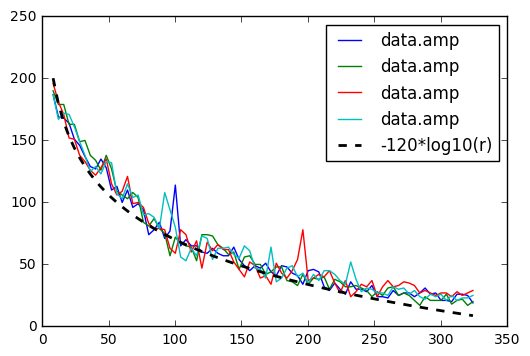

In [292]:
plt.plot(data.dep,data.amp[10,:,:],label='data.amp')
plt.plot(data.dep,-120*np.log10(data.dep)+310,'k--',linewidth=2,label='-120*log10(r)')
plt.legend()

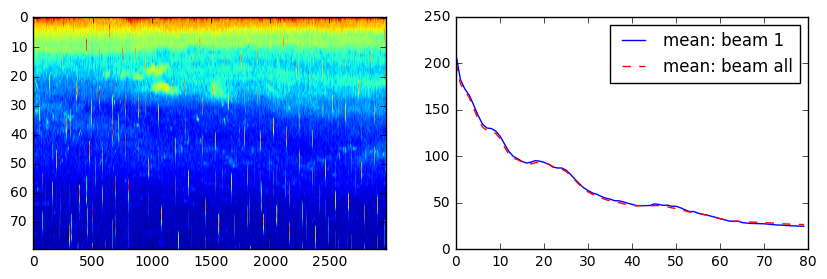

In [357]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.imshow(data.amp[:,:,1].T,aspect='auto')
plt.subplot(122)
plt.plot(np.mean(data.amp[:,:,1],axis=0),label='mean: beam 1')
plt.plot(np.mean(data.amp,axis=(0,2)),'r--',label='mean: beam all')
plt.legend()

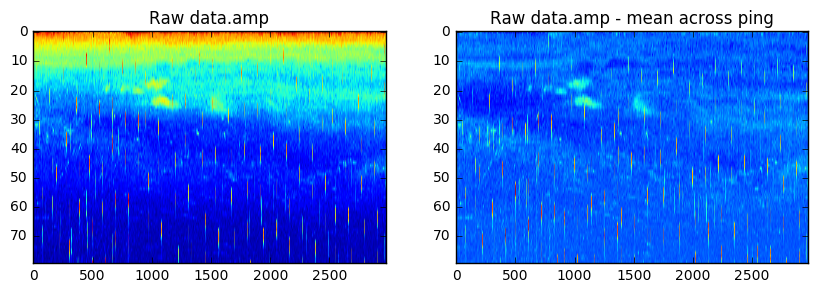

In [359]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.imshow(data.amp[:,:,1].T,aspect='auto')
plt.title('Raw data.amp')
plt.subplot(122)
plt.imshow((data.amp[:,:,1]-np.mean(data.amp[:,:,1],axis=0)).T,aspect='auto')
plt.title('Raw data.amp - mean across ping')

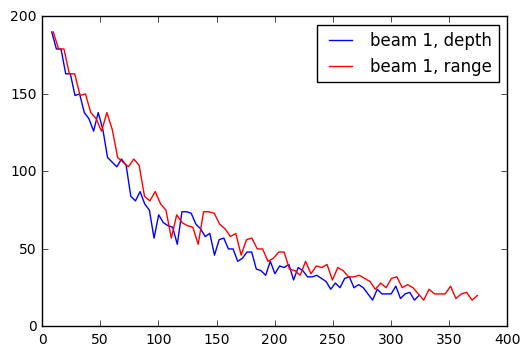

In [318]:
plt.plot(data.dep,data.amp[10,:,1],label='beam 1, depth')
plt.plot(data.dep/np.cos(np.pi/6),data.amp[10,:,1],'r-',label='beam 1, range')
#plt.plot(data.dep,-120*np.log10(data.dep)+310,'k--',linewidth=2,label='-120*log10(r)')
plt.legend()

In [301]:
m.sysconfig

{'angle': 30, 'convex': True, 'kHz': 150, 'up': False}

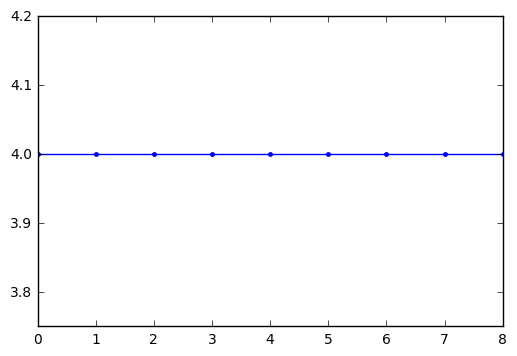

In [294]:
plt.plot(np.diff(data.dep[0:10]),'b.-')